# Анализ компьютерных игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
# подключим необходимые библиотеки для исследования 
import numpy as np
import scipy.stats as stats

from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#df=pd.read_csv('games.csv')

import os

pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software RatingBoard). Эта ассоциация определяет рейтинг компьютерных игр и присваиваетим подходящую возрастную категорию.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В полученных данных есть 11 колонок с разными типами данных и существуют пропуски в некотоорых колонках, а также названия колонок не постандарту названы.

### Шаг 2. Подготовим данные

#### Для начала переименуем названия колонок

In [4]:
#приведем названия колонок к нижнему регистру
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
df.columns # проверка результатов - перечень названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Теперь поработаем с пропусками:
    
В названии игр есть два пропуска. Посмотрим, как выглядят эти строки:

In [5]:
display(df[df['name'].isna()].head()) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
# удалим эти две строки, тк они не несут никакой нужной инфо и их всего 2
df=df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим пропуски с датами на `9999`, чтобы можно было изменить тип данных на `int`

In [7]:
df['year_of_release']=df['year_of_release'].fillna('9999')
#меняем сразу тип данных на int
df['year_of_release'] = df['year_of_release'].astype('int')
#проверяем какие уникальные значения получились
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 9999, 1995,
       1991, 1981, 1987, 1980, 1983])

#### Посмотрим данные в колонке 'user_score'

In [8]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.2       2
1.1       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Мы видим, что помимо пропусков у нас в данных есть еще и `tbd`. Их общее количество очень велико для удаления строк. Но удостоверимся, посчитав долю пропусков + `tbd`:

In [9]:
(len(df[df['user_score']=='tbd'])/len(df['user_score']))*100

14.503679770238737

In [10]:
df.groupby(['name', 'user_score'])['user_score'].count().tail(10)

name                          user_score
pro evolution soccer 2011     5.8           1
                              5.9           1
                              6.7           1
                              6.8           1
thinkSMART                    tbd           1
thinkSMART FAMILY!            tbd           1
thinkSMART: Chess for Kids    tbd           1
uDraw Studio                  tbd           1
uDraw Studio: Instant Artist  5.7           1
                              tbd           1
Name: user_score, dtype: int64

Доля получилась более 14% - это много, чтобы удалить строки. Заменить tbd, например на среднее значение, тоже не лучшее решение, тк в дальнейшем  может искажать действительность. Например, те игры, по которым рейтинга не было, то после замены, игра получит средний рейтинг и может даже попадет  в список удачных игр. Вторая проблема - столбец имеет тип данных `object` и мы не можем производить математические расчеты. Следовательно, чтобы не искжать данные и иметь возможность поменять тип данных, заменим  `tbd` на `NaN`

In [11]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')
df['user_score'].value_counts(dropna=False)

NaN    6699
NaN    2424
7.8     324
8       290
8.2     282
       ... 
0.9       2
0.3       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [12]:
#меняем тип данных на float и проверяем
df['user_score']=df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
df['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.0       2
1.5       2
9.6       2
0.0       1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [14]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Получили реальные данные: среднее значение и медианное около 7 и стандартное отклонение 1.5

#### Сделаем новый столбец, в котором посчитаем сумму продаж по всем регионам: 

In [15]:
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В столбце rating так же имеются попуски. Заменить NaN  на "not defined", для этого используем fillna()

In [16]:
df['rating'] = df['rating'].fillna('not defined')
df['rating'].value_counts(dropna=False)

not defined    6764
E              3990
T              2961
M              1563
E10+           1420
EC                8
K-A               3
RP                3
AO                1
Name: rating, dtype: int64

### Шаг 3. Проведем исследовательский анализ данных

1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [17]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
9999     269
Name: name, dtype: int64

Мы видим, что в датафрейме есть данные с 1980 по 2016 гг. Из полученных данные видим следующую закономерность:
* с 1980 по 1993 игр было меньше 100
* с 1994 по 2005 - меньше 1000
* с 2006 по 2011 - был пик появления игр - от 1000 шт
* с 2016 по 2016 = спад относительно прошлого периода - более 100, но менее 1000 шт

2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

In [19]:
#запишем в переменную best список из первых 24 платформ
best=df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(24).index
best

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC'],
      dtype='object', name='platform')

In [20]:
#отфильтруем методом query() и сделаем сводник за последние 10 лет и платформам методом pivot_table
df_platform=(
    df.query('platform in @best and year_of_release != 9999 and year_of_release>2005')
    .pivot_table(index='year_of_release', columns='platform' , values='sum_sales', aggfunc='sum')
)
df_platform

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07


<Figure size 360x360 with 0 Axes>

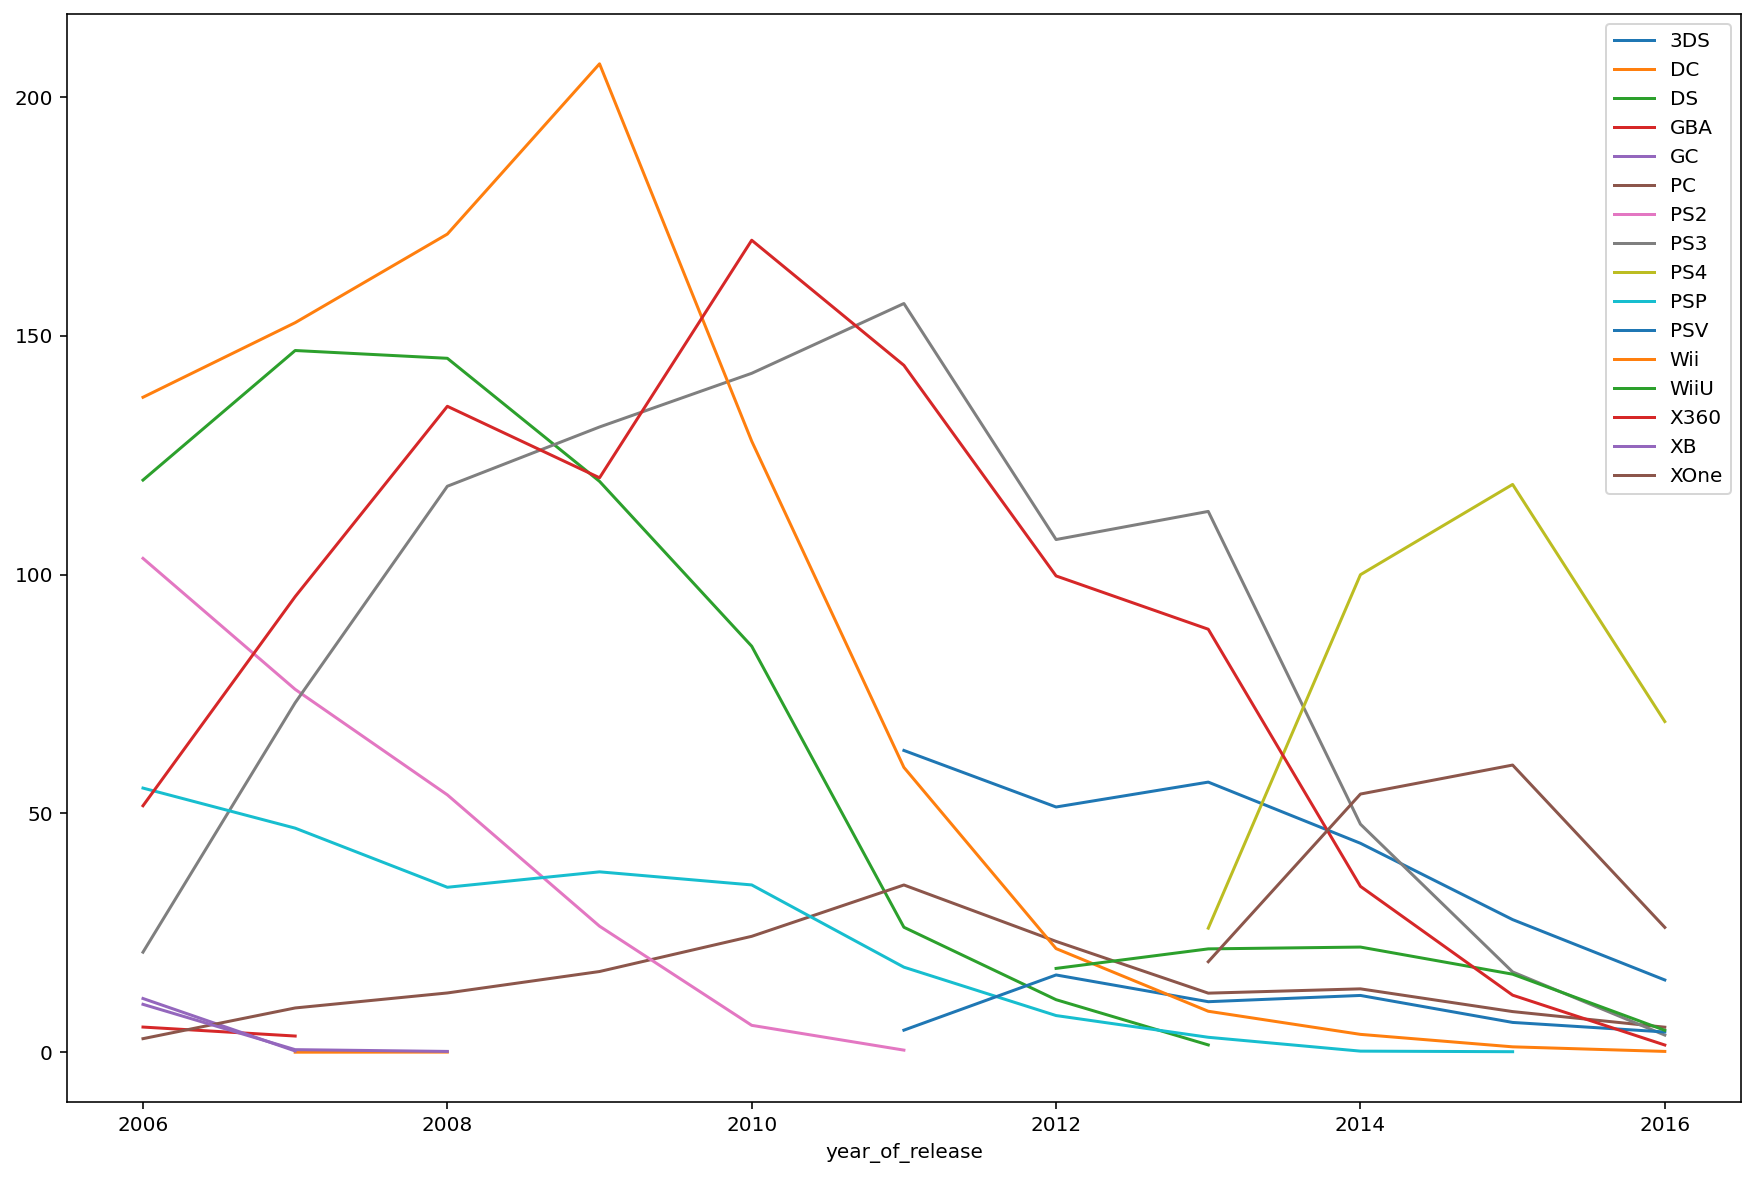

In [21]:
plt.figure(figsize=(5,5))
df_platform.plot(label='platform', figsize=(15,10))
plt.legend()

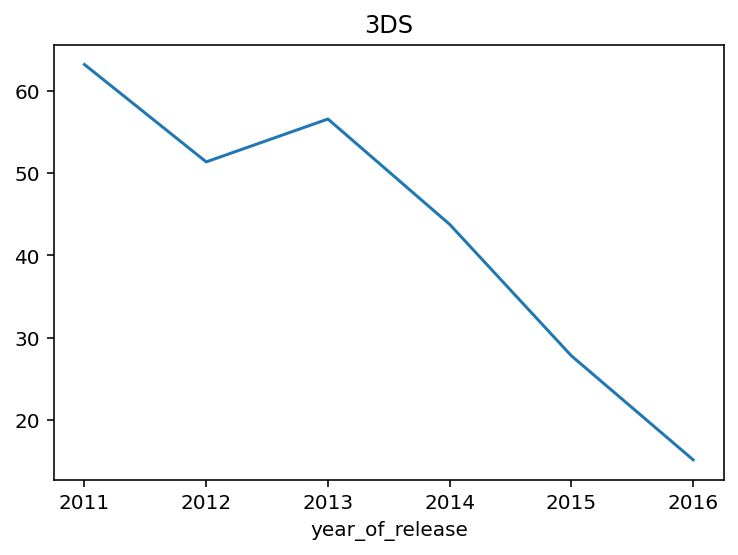

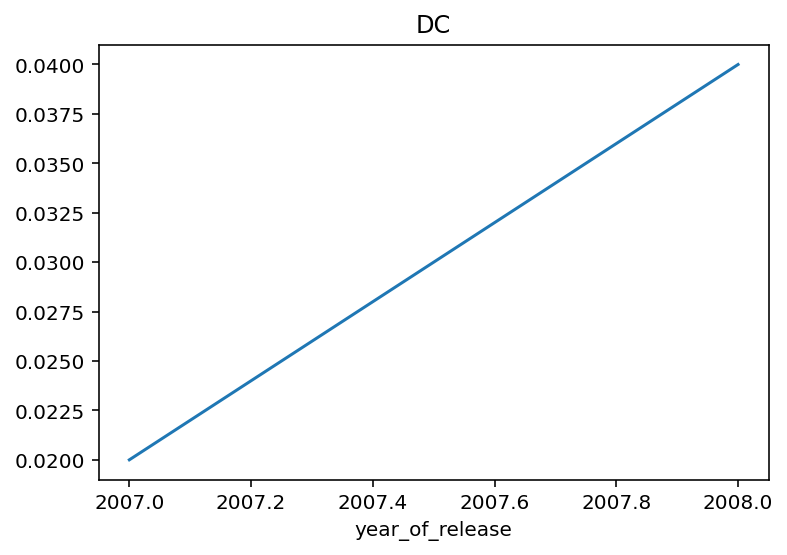

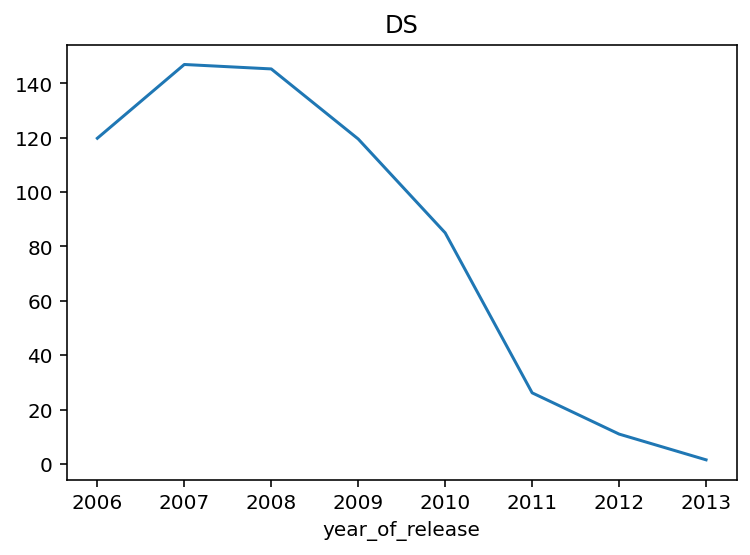

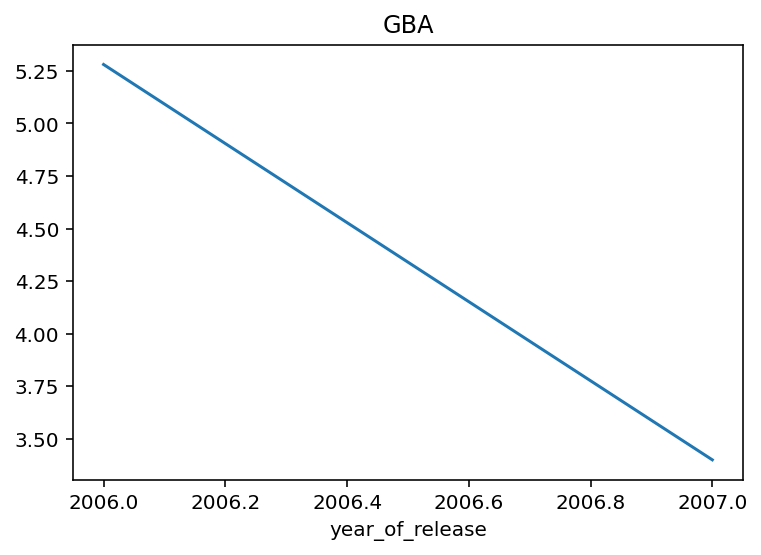

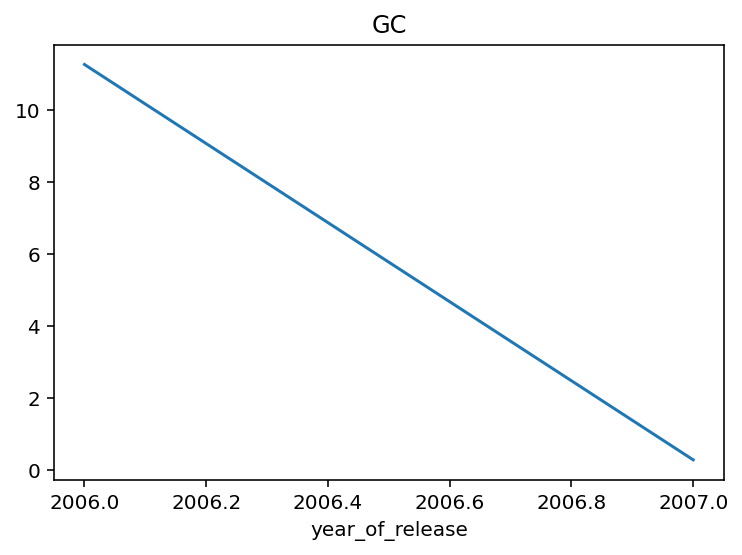

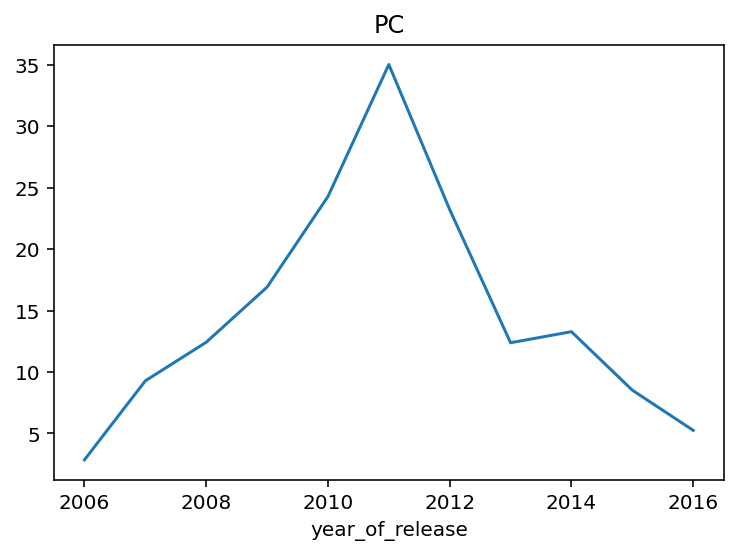

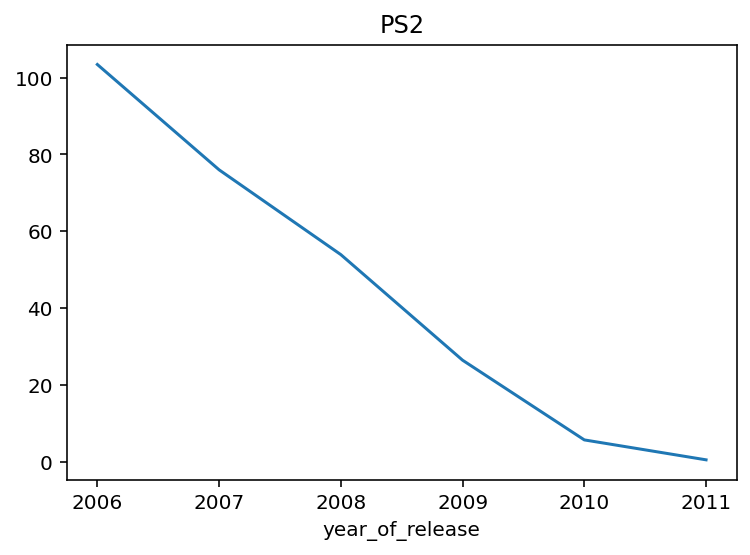

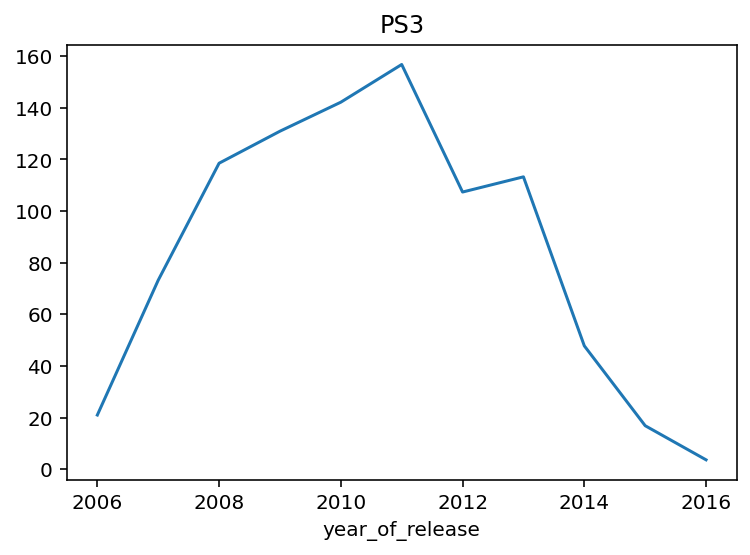

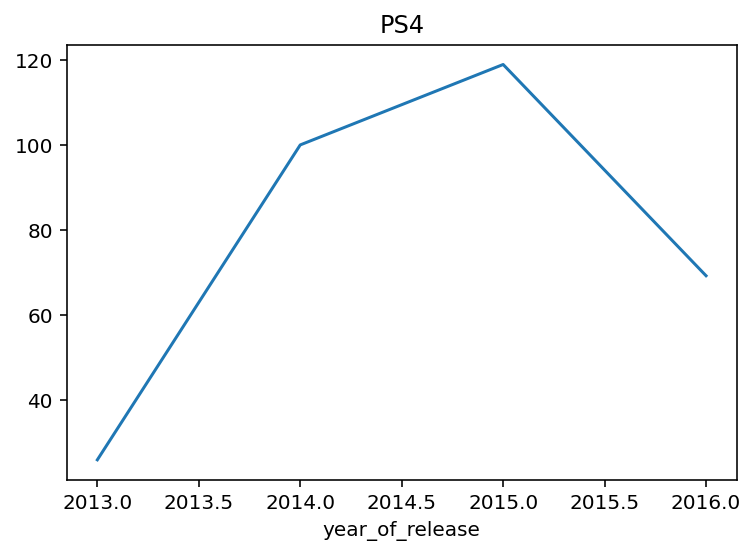

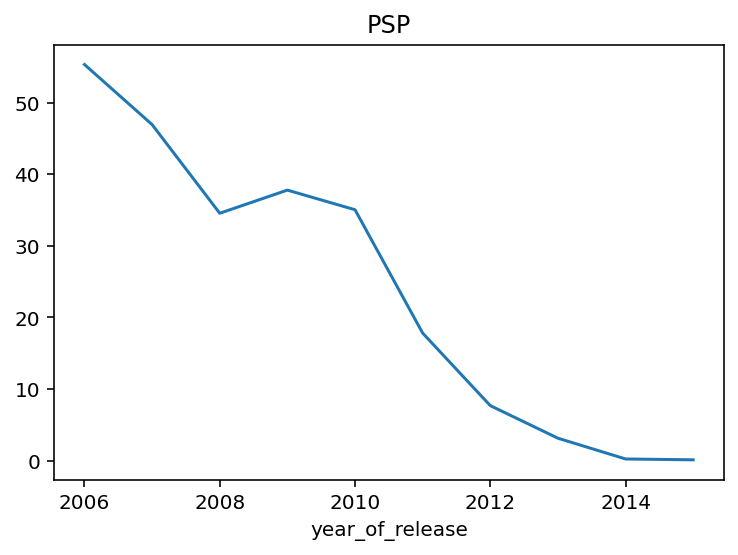

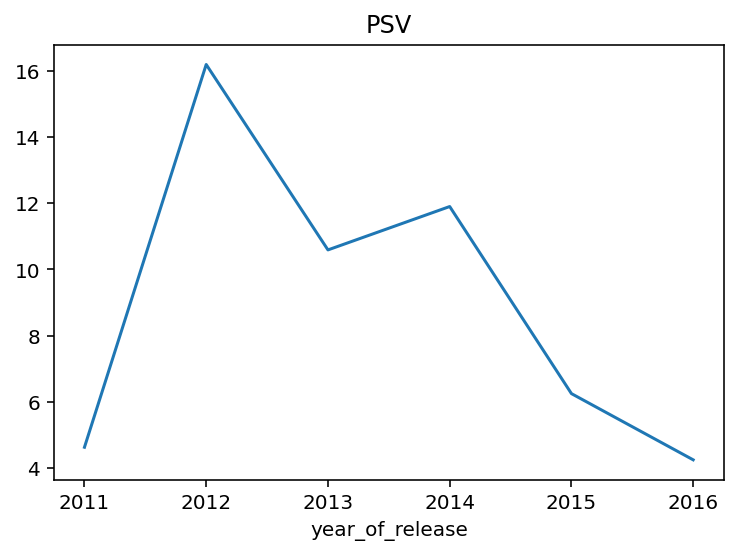

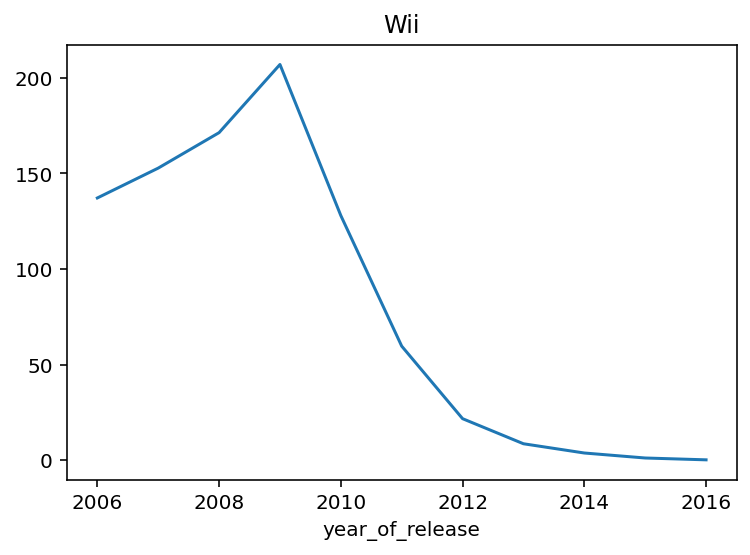

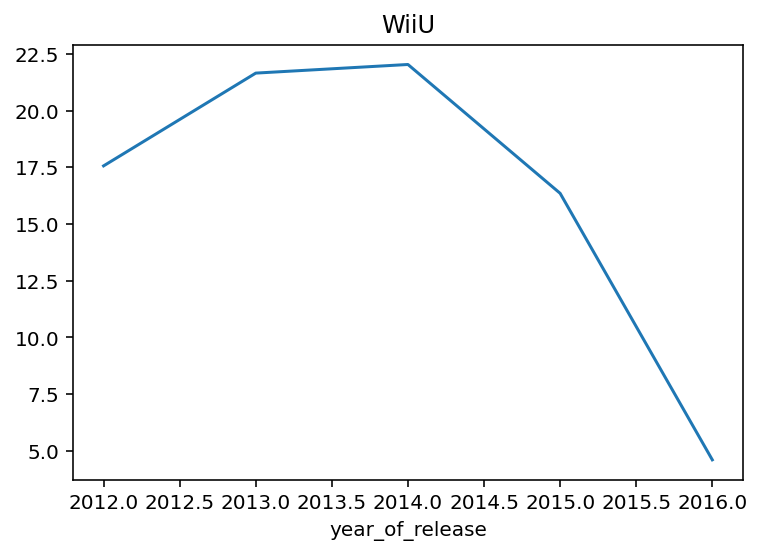

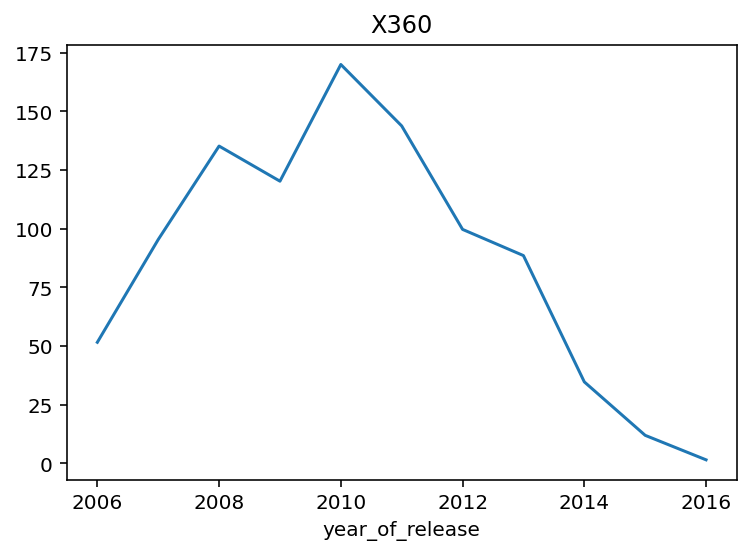

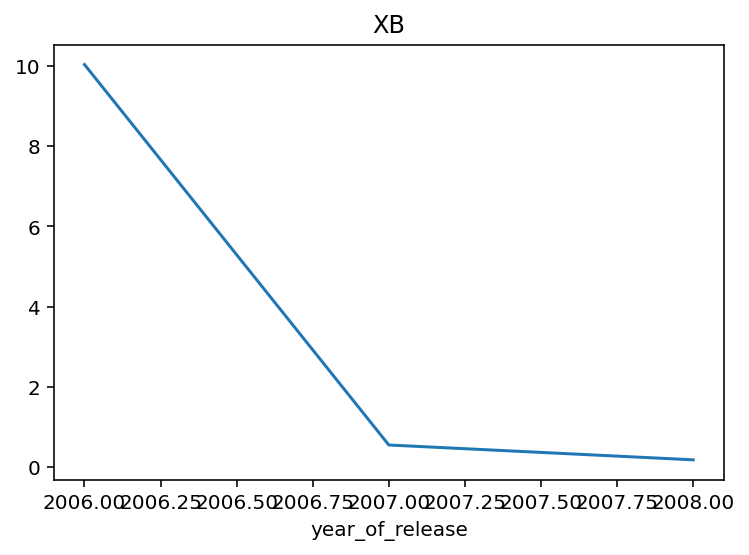

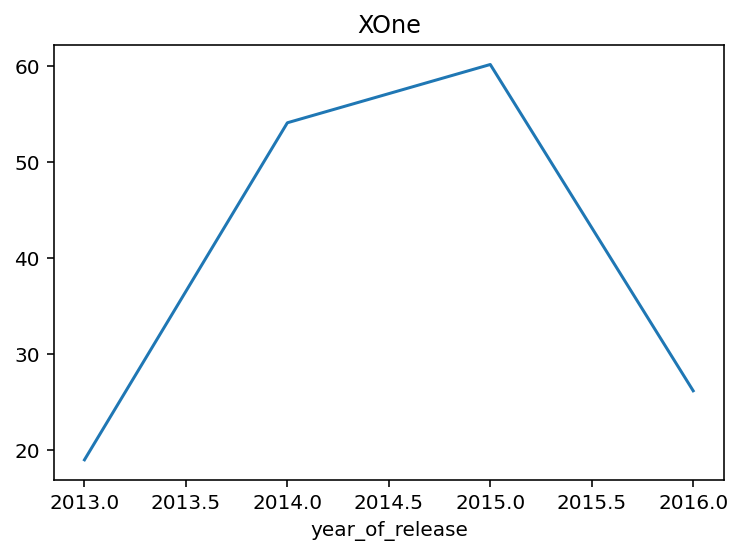

In [22]:
# Код ревьюера

def test_plot(data_plot, platform):
    data_plot[platform].plot(title=platform)
    plt.show()

for column in df_platform.columns:
    test_plot(df_platform, column)

По сводной таблице и по графику мы видим, что все течет и изменяется:
* например `DC`, `GBA`, которые входили в пятерку лучших за все года, прекратили cвое существование в период 2006-2016 гг
* есть пдатформы, которые за взятые 10 лет взамозаменили друг друга, например сначала была PS2, потом на ее смену пришла PS3, а с 2013 пришла PS4 и с этого же года стали резко падать продажи по PS3
* такая же аналогия прослеживается с  `Wii`, на ее смену появляется  `WiiU` с 2012 года и продажи только растут
* если взять первую пятерку лидеров за все года, то их жизненный цикл заканчивается за взятый период 10 лет

В итоге можно выделить следующие перспективные площадки для развития: PS4, WiiU, XOne, 3DS, PC, PSV, X360. И актуальный период для этих площадок возьмем с 2013 по 2016 гг, в этот период все выделенные площадки уже появились на рынке.

In [23]:
(
    df.query('platform in @best and year_of_release != 9999 and year_of_release>2012')
    .groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: sum_sales, dtype: float64

Для дальнейших исследований выберем `актуальный период` с 2013 по 2016 гг и первую шестерку платформ (лидеры продаж за данный период), а именно:PS4, PS3 (хотя я бы не стала ставить на эту платформу, она замещается постепенно PS4),XOne, 3DS, X360, WiiU.

Сделаем выборку данных удовлетворяющих вышеперечисленному условию:

In [24]:
best1=df.query('platform in @best and year_of_release != 9999 and year_of_release>2012').groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(6).index
best1

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU'], dtype='object', name='platform')

In [25]:
df_period=df.query('platform in @best1 and year_of_release != 9999 and year_of_release>2012')
df_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not defined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,not defined,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

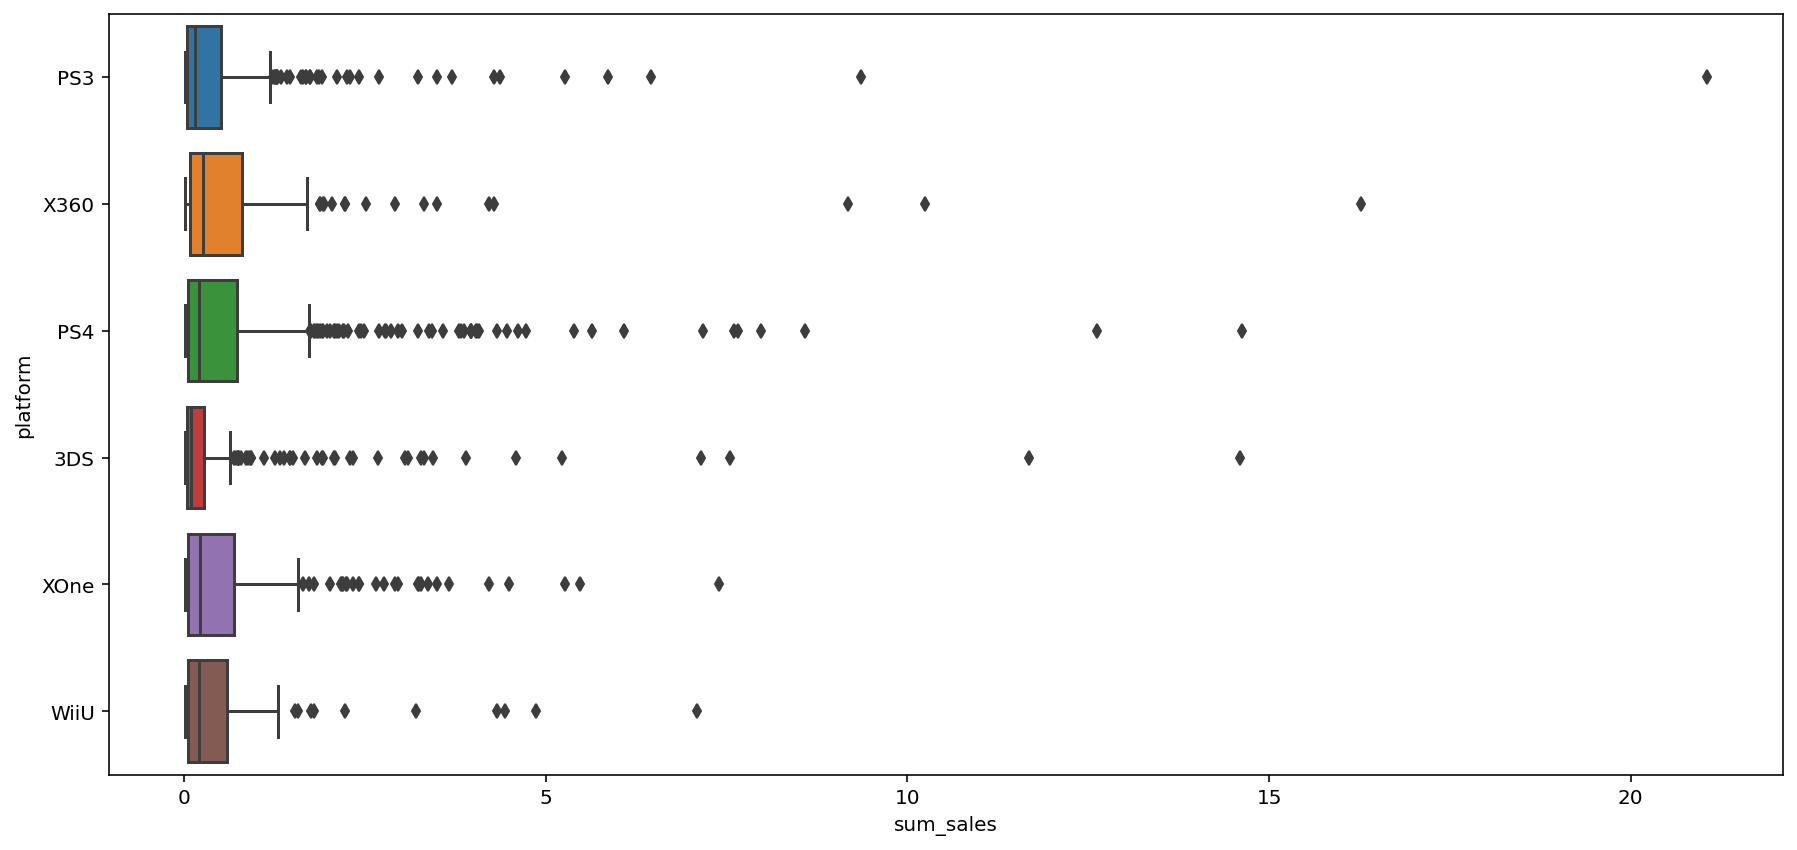

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(y='platform', x='sum_sales', data=df_period)
plt.show()

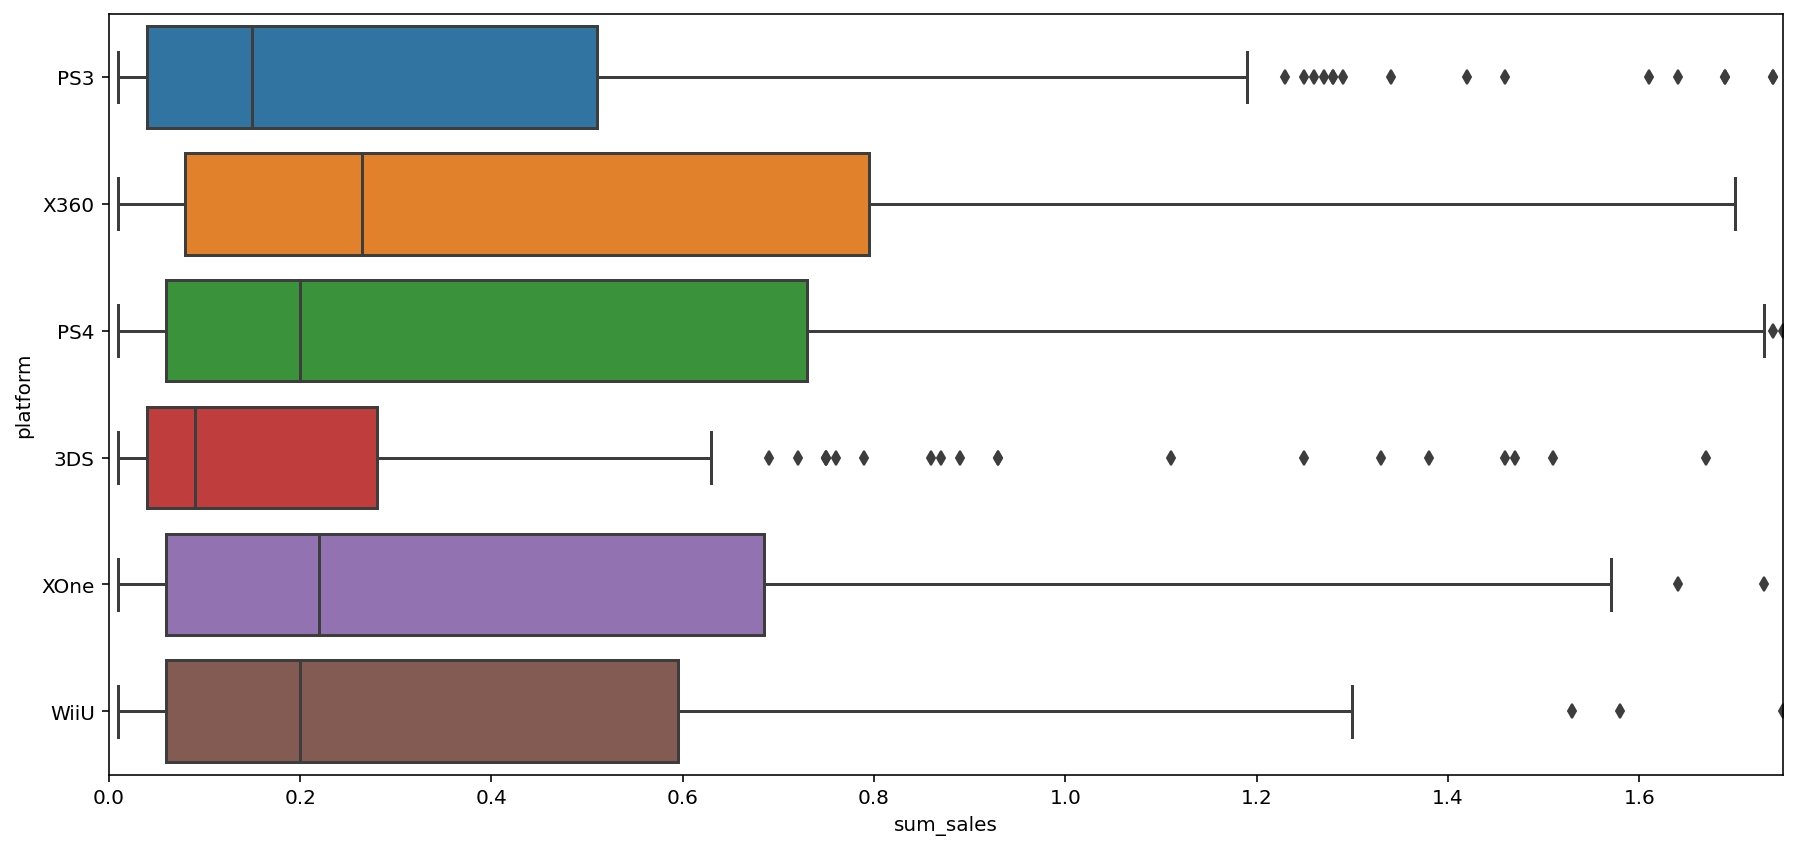

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(y='platform', x='sum_sales', data=df_period)
plt.xlim([0, 1.75])
plt.show()

Мы видим, что:
* нижний «ус» упирается в 0, минимальное значение
* правый ус самый маленький у 3DS, самый динный у X360 и PS4
* у всех платформ много выбросов справо, меньше всего у WiiU

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для этого возьмем саму популярную и прибыльную `PS4`, для этого создадим промежуточный датафрейм и рассмотрим более подробно:


In [28]:
df_ps4=df_period[df_period['platform']=='PS4']
df_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not defined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [29]:
df_ps4['sum_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [30]:
df_ps4['user_score'].describe()

count    257.000000
mean       6.748249
std        1.459481
min        1.500000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

In [31]:
df_ps4['critic_score'].describe()

count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

In [32]:
df_ps4[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


array([[<AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>],
       [<AxesSubplot:xlabel='sum_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>],
       [<AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>]],
      dtype=object)

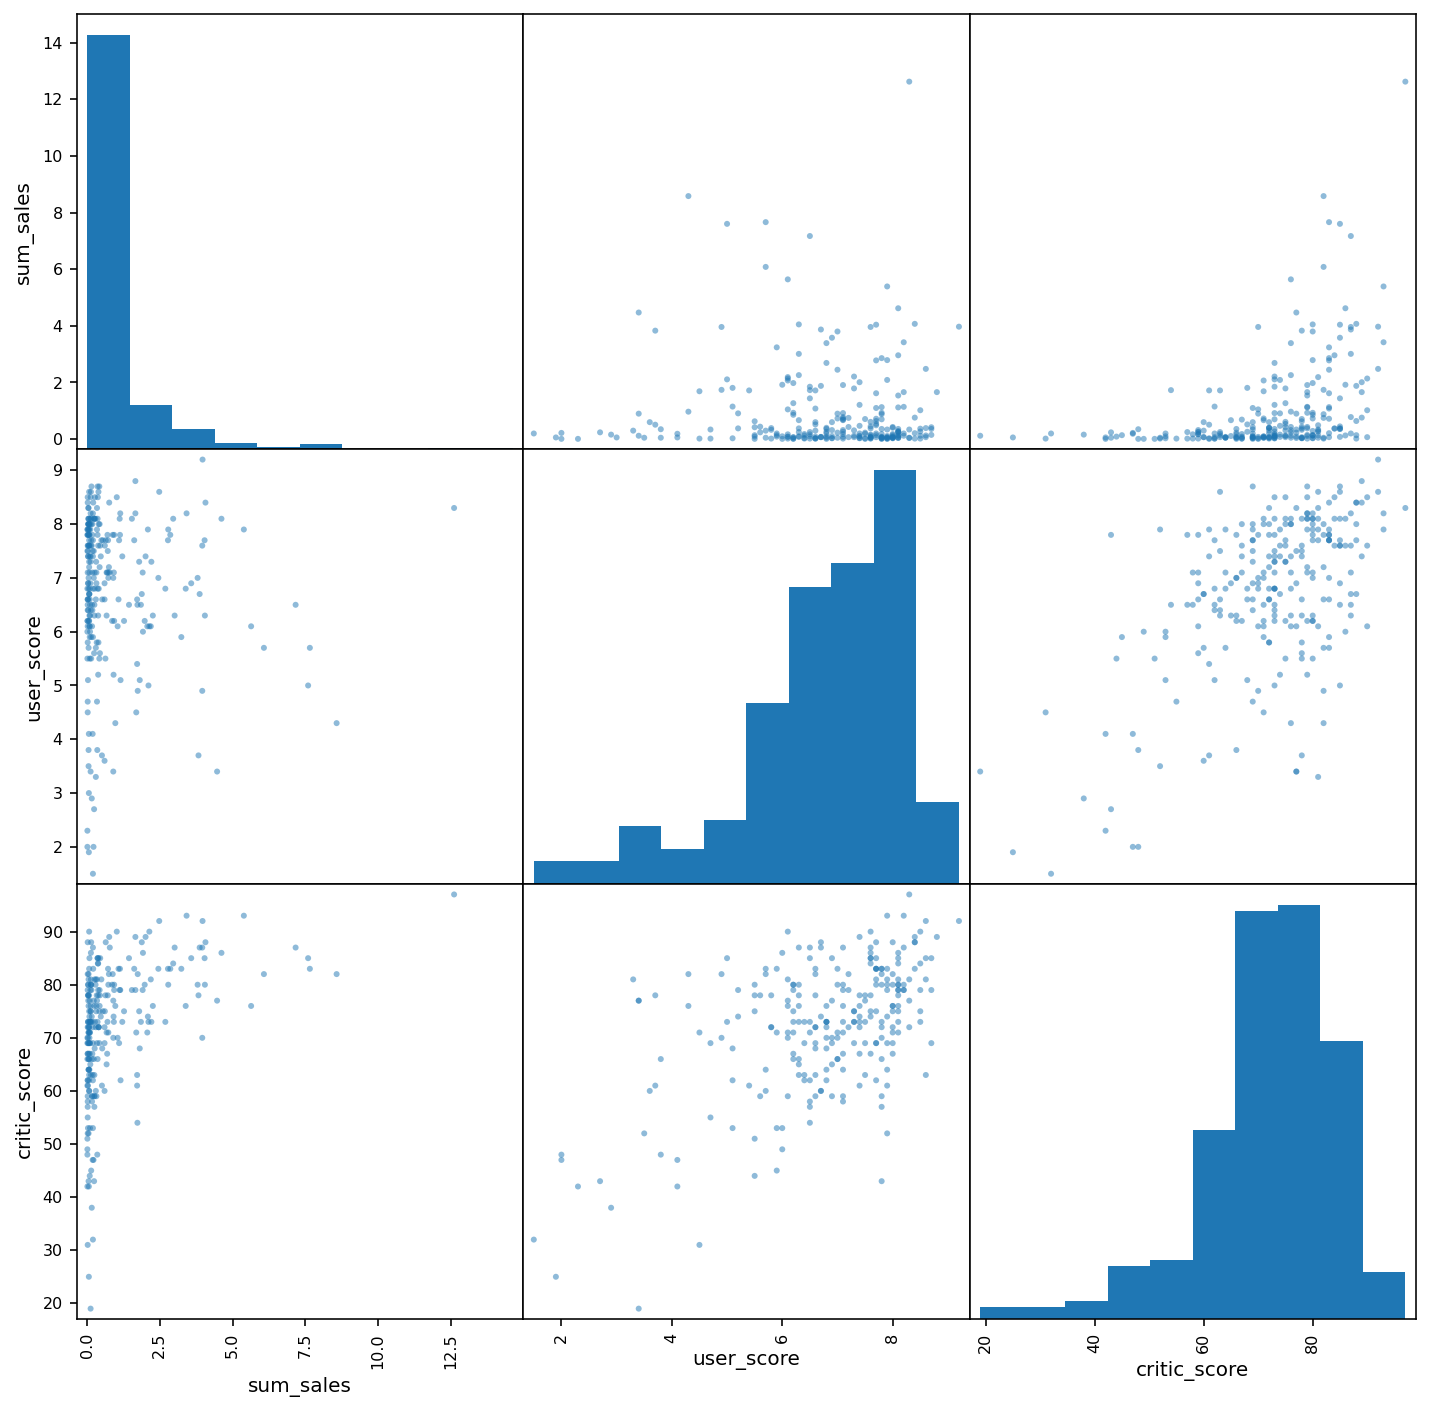

In [33]:
pd.plotting.scatter_matrix(df_ps4[['sum_sales', 'user_score', 'critic_score']], figsize=(12, 12)) 

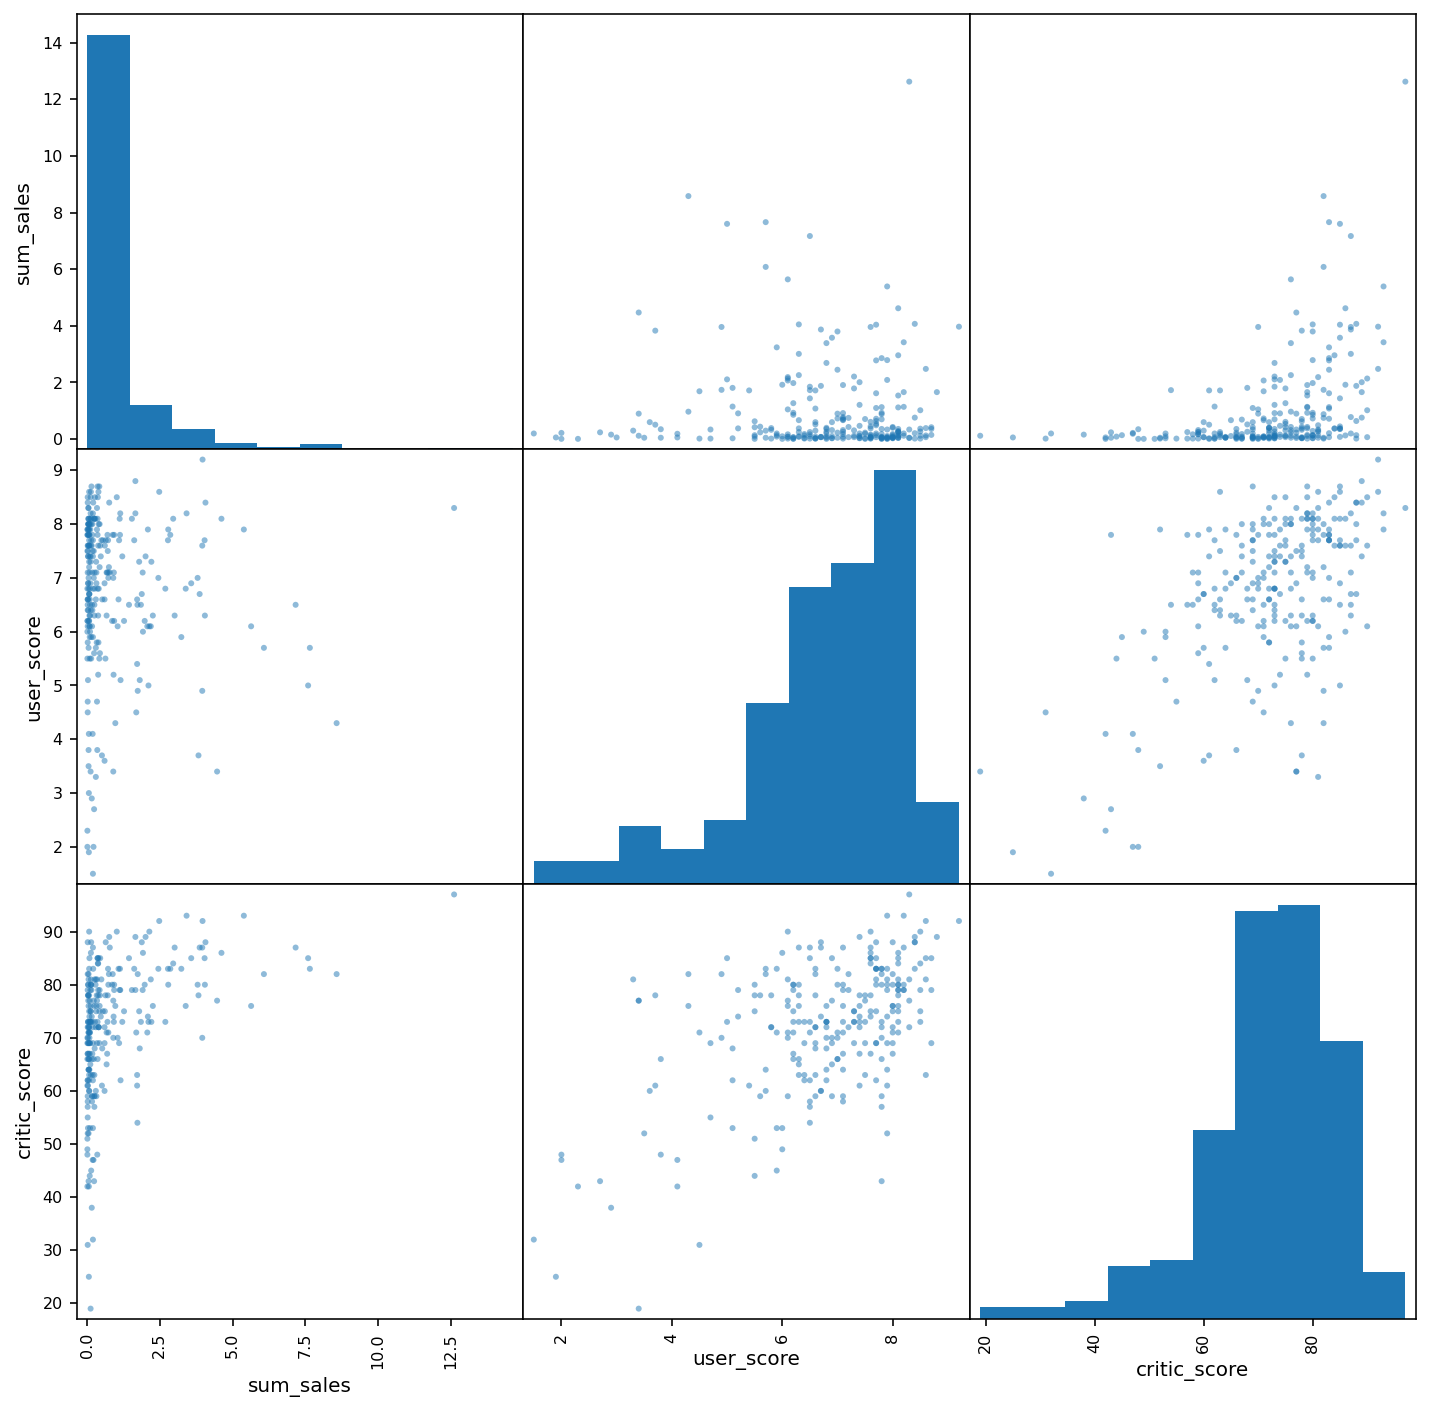

In [34]:
# Код ревьюера

pd.plotting.scatter_matrix(df_ps4[['sum_sales', 'user_score', 'critic_score']], figsize=(12, 12)) 
None

Какие выводы можно сделать:
* Корреляция в 0.4 говорит о наличии связи между суммой и оценкой критиками, однако не слишком сильная, а вот между суммой и пользовательской критикой всего -0,03, связи практически нет. и графики это тоже доказывают.
* гистограммы оценок критиков и пользователей похожи и имеют отрицательную скошенность


#### Посмотрим как обстоит ситуация на других площадках:

In [35]:
df_ps3=df_period[df_period['platform']=='PS3']
df_ps3[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


In [36]:
df_XOne=df_period[df_period['platform']=='XOne']
df_XOne[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


In [37]:
df_3DS=df_period[df_period['platform']=='3DS']
df_3DS[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


In [38]:
df_X360=df_period[df_period['platform']=='X360']
df_X360[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.011742,0.350345
user_score,-0.011742,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


На всех площадках аналогичная ситуация в целом: мы имеем очень маленький размер кореляции (почти во всех случаях отрицательная) продаж и оценки пользовательской и побльше, но все равно достаточно слабой (0,35-0,4) между продажами и оценкой критиками. Это говорит о том, что нет линейной взаимосвязи между суммой продаж и оценочным мнением об играх.

### Посмотрим на общее распределение игр по жанрам. 

In [39]:
df_period.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)

genre
Action          300.71
Shooter         221.70
Sports          144.94
Role-Playing    129.76
Misc             50.95
Platform         39.15
Racing           38.82
Fighting         34.00
Adventure        18.76
Simulation       13.25
Strategy          4.42
Puzzle            3.11
Name: sum_sales, dtype: float64

Получаем четыре лидера из жанров (`Action`, `Shooter`, `Sports`, `Role-Playing`), потом видим 5 средничков и два жанра самых не популярных (`Strategy`, `Puzzle`). 

Посмотрим как распределяются рейтинги жанров по платформам:

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

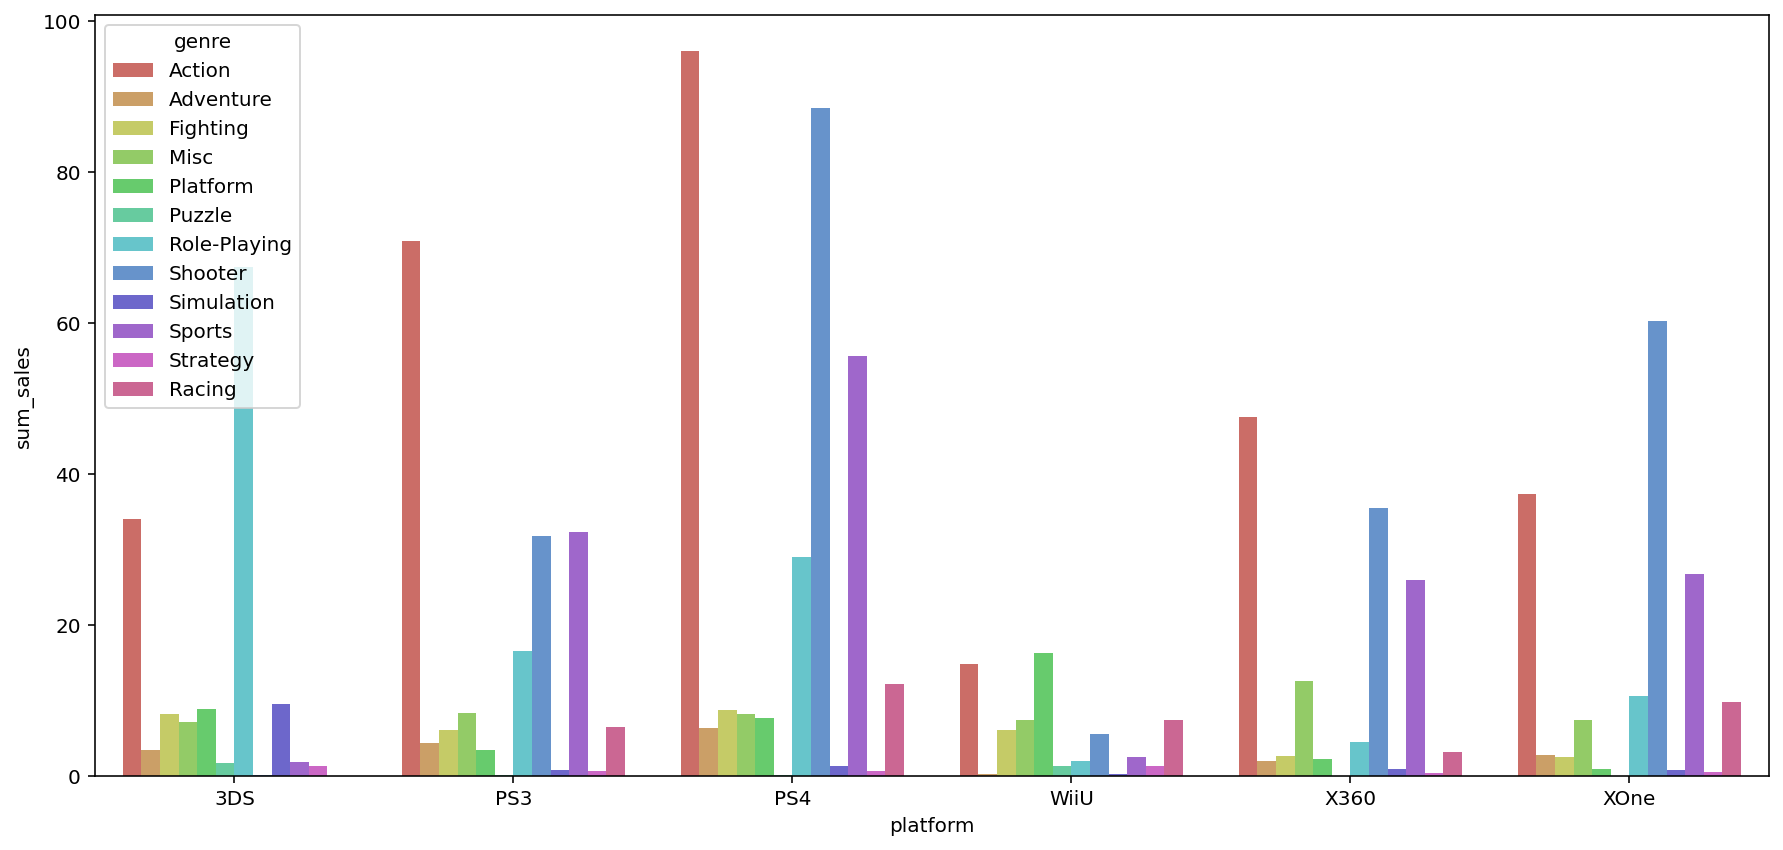

In [40]:
df2=df_period.pivot_table(index=['platform','genre'], values='sum_sales', aggfunc='sum').reset_index()
plt.figure(figsize=(15,7))
sns.barplot(data=df2, x='platform', y='sum_sales', hue='genre', ci=None, palette = 'hls')


(0.0, 2.0)

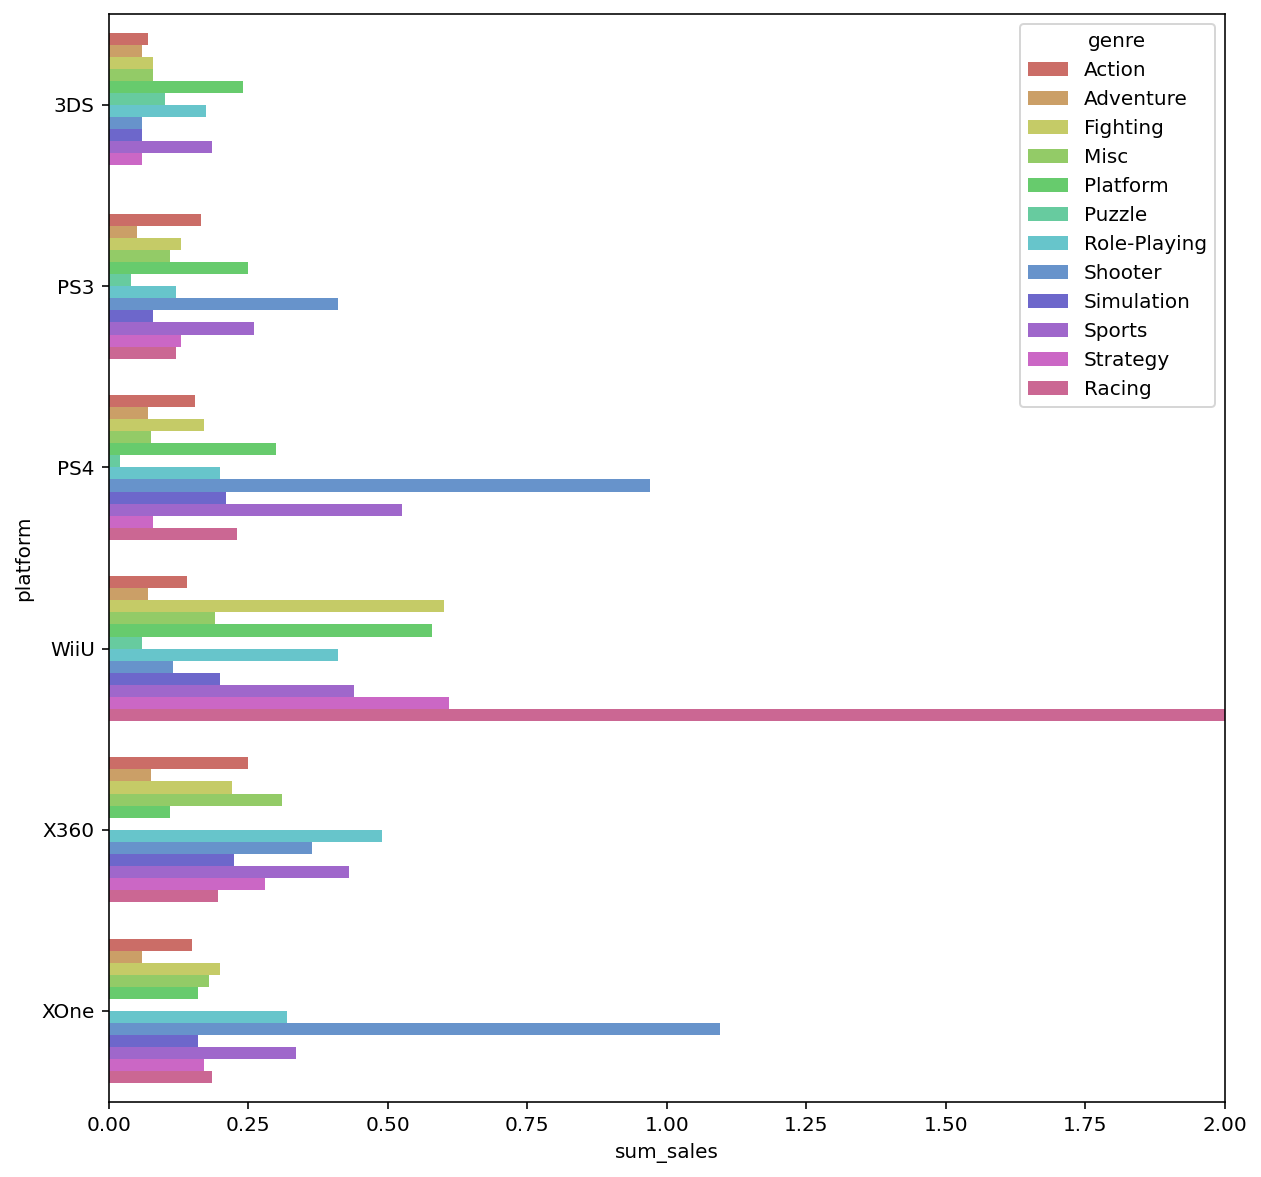

In [41]:
df2=df_period.pivot_table(index=['platform','genre'], values='sum_sales', aggfunc='median').reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=df2, y='platform', x='sum_sales', hue='genre', ci=None, palette = 'hls')
plt.xlim([0, 2])

если смотреть по платформам, то лидеры остаются те же, но первенство меняется в зависимости от площадки. например:
* PS3, PS4, XOne, X360 - тройка лидеров `Shooter`, `Sports`
* 3DS лидеры `Platform`, `Role-Playing`
* WiiU лидеры `Racing`, `Strategy`

В итоге по общим суммам лидером почти по всем площадкам `Action`, а по медианным в основном `Shooter`, `Sports`

### Шаг 4. Составьте портрет пользователя каждого региона

#### Самые популярные платформы

In [42]:
df_platform=df_period.pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_platform['share_eu']=(df_platform['eu_sales']/(df_platform['eu_sales'].sum())).round(2)
df_platform['share_jp']=(df_platform['jp_sales']/(df_platform['jp_sales'].sum())).round(2)
df_platform['share_na']=(df_platform['na_sales']/(df_platform['na_sales'].sum())).round(2)
df_platform

,eu_sales,jp_sales,na_sales,share_eu,share_jp,share_na
platform,,,,,,
3DS,30.96,67.81,38.20,0.09,0.57,0.09
PS3,67.81,23.35,63.50,0.19,0.20,0.15
PS4,141.09,15.96,108.74,0.40,0.13,0.26
WiiU,19.85,10.88,29.21,0.06,0.09,0.07
X360,42.52,0.51,81.66,0.12,0.00,0.20
XOne,51.59,0.34,93.12,0.15,0.00,0.22


Для каждого региона популярность платформ отличается:
* в Северной Америке - PS4 (ее доля составляет 0.26 от общих продаж по региону) и еще две с похожими долями X360 и XOne
* в Японии - лидер 3DS (доля 0.57) и менее значимая PS3 (доля 0.2), и есть две площадки X360 и XOne - их лоли стремятся к нулю
* в Европе - лидер PS4 (доля 0.4), и догоняет PS3 ( доля 0.19) и XOne (доля 0.15)

В итоге получаем, что для каждого региона свой лидер по площадкам и разные распределения, например, в Японии и Европе бесусловные единичные лидеры, а вот в Америке первенство делят три платформы.

#### Самые популярные жанры

In [43]:
df_genre=df_period.pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_genre['share_eu']=(df_genre['eu_sales']/(df_genre['eu_sales'].sum())).round(2)
df_genre['share_jp']=(df_genre['jp_sales']/(df_genre['jp_sales'].sum())).round(2)
df_genre['share_na']=(df_genre['na_sales']/(df_genre['na_sales'].sum())).round(2)
df_genre

,eu_sales,jp_sales,na_sales,share_eu,share_jp,share_na
genre,,,,,,
Action,110.28,33.78,121.09,0.31,0.28,0.29
Adventure,7.05,3.17,6.48,0.02,0.03,0.02
Fighting,8.30,6.98,15.28,0.02,0.06,0.04
Misc,15.90,6.94,23.09,0.04,0.06,0.06
Platform,14.08,4.75,16.55,0.04,0.04,0.04
Puzzle,0.99,1.13,0.83,0.00,0.01,0.00
Racing,19.31,2.21,12.92,0.05,0.02,0.03
Role-Playing,33.17,43.17,43.07,0.09,0.36,0.10
Shooter,81.51,6.56,105.97,0.23,0.06,0.26


По регионам жанры распределились следующим образом:
* в Северной Америке - Action и Shooter и Sports
* в Японии - Role-Playing и Action
* в Европе - Action и Shooter и Sports
Еще можно отметить, что для Европы  и Америки рейтинг практически идентичен, то есть стратению продвижения игр по жанру можно сделать общую.

In [44]:
#### Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [45]:
df_rating=df_period.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_rating['share_eu']=(df_rating['eu_sales']/(df_rating['eu_sales'].sum())).round(2)
df_rating['share_jp']=(df_rating['jp_sales']/(df_rating['jp_sales'].sum())).round(2)
df_rating['share_na']=(df_rating['na_sales']/(df_rating['na_sales'].sum())).round(2)
df_rating

,eu_sales,jp_sales,na_sales,share_eu,share_jp,share_na
rating,,,,,,
E,77.35,14.94,77.79,0.22,0.13,0.19
E10+,34.73,5.61,46.74,0.10,0.05,0.11
M,133.82,12.69,157.76,0.38,0.11,0.38
T,35.03,15.36,45.17,0.10,0.13,0.11
not defined,72.89,70.25,86.97,0.21,0.59,0.21


Text(0.5, 1.0, 'na_sales')

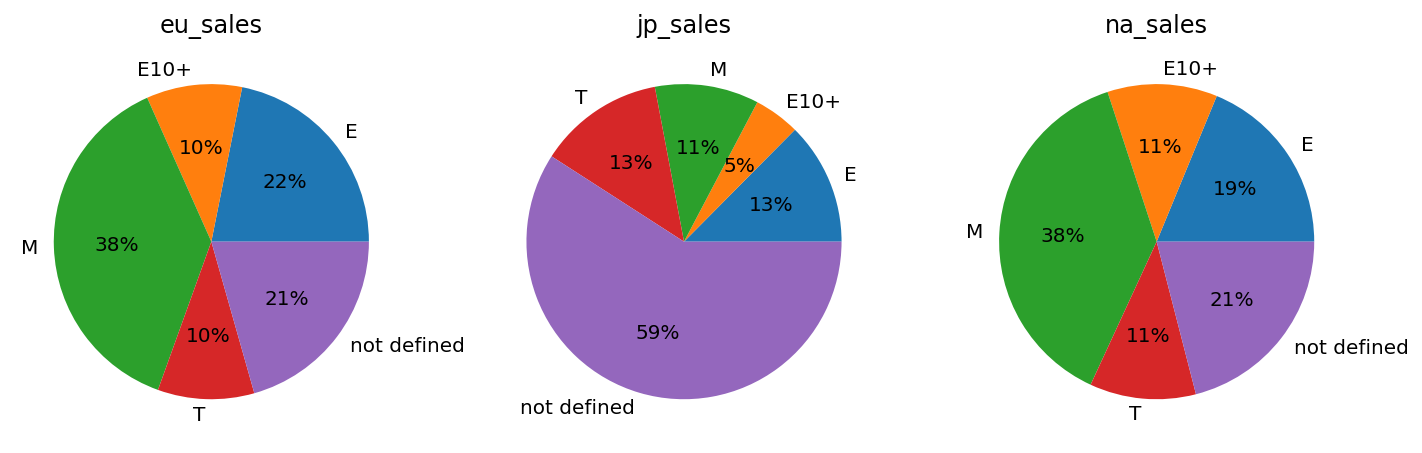

In [46]:
data=df_period.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].pie(data['eu_sales'],labels=data.index, autopct='%.0f%%')
axes[0].set_title("eu_sales")
axes[1].pie(data['jp_sales'],labels=data.index, autopct='%.0f%%')
axes[1].set_title("jp_sales")
axes[2].pie(data['na_sales'],labels=data.index, autopct='%.0f%%')
axes[2].set_title("na_sales")


Для справки
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет

для Европы и Америки рейтинг также схож, самые популярные для взрослых, потом для всех. Для Японии два лидера для подростков и для всех.

#### Вывод:
для Европы и Америки можно делать ставку на игру для взрослых в жанре Action	на платформе PS4, Для Японии игра для взрослых или для всех в жанре Role-Playing для платформы 3DS

### Шаг 5. Проверяем гипотезы

Для того, чтобы приступить к проверке, нам необходимо подготовить данные.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для этой гепотизы нам сначала нужно создать две выборки и удалить пропуски:

In [47]:
#создаем выборку по платформе XOne для выбранного актуального периода с 2013 по 2016 гг
df_xbox=df.loc[(df['platform']=='XOne') & ((df['year_of_release']!=9999) & (df['year_of_release']>2012))]
df_xbox

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,not defined,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,not defined,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,not defined,0.01


In [48]:
#считаем сколько пропусков в столбце с пользовательским рейтингом
df_xbox['user_score'].isna().sum()

65

In [49]:
#удаляем строки с пропусками и проверяем сколько строк осталось
df_xbox = df_xbox.dropna(subset=['user_score'])
df_xbox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    int64  
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           182 non-null    object 
 11  sum_sales        182 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 18.5+ KB


In [50]:
#создаем выборку по платформе PC для выбранного актуального периода с 2013 по 2016 гг
df_pc=df[(df['platform']=='PC') & ((df['year_of_release']!=9999) & (df['year_of_release']>2012))]
df_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
16617,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,not defined,0.01
16631,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,not defined,0.01


In [51]:
#считаем пропуски
df_pc['user_score'].isna().sum()

34

In [52]:
#удаляем пропуски и проверяем
df_pc = df_pc.dropna(subset=['user_score'])

df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             155 non-null    object 
 1   platform         155 non-null    object 
 2   year_of_release  155 non-null    int64  
 3   genre            155 non-null    object 
 4   na_sales         155 non-null    float64
 5   eu_sales         155 non-null    float64
 6   jp_sales         155 non-null    float64
 7   other_sales      155 non-null    float64
 8   critic_score     148 non-null    float64
 9   user_score       155 non-null    float64
 10  rating           155 non-null    object 
 11  sum_sales        155 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.7+ KB


Формируем гепотизы для двух независимых выборок:

Н0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 не равны

Проверяем гепотизу с помощью t-тест и укажем equal_var = False, тк наши выборки не равны по количеству строк

In [53]:
from scipy import stats as st
import numpy as np
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: Данные предоставляют достаточное основание — для выбранного уровня значимости — не отвергать нулевую гипотезу. Значит, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гепотизы также создаем две выборки:

In [54]:
df_action=df.loc[(df['genre']=='Action') & ((df['year_of_release']!=9999) & (df['year_of_release']>2012))]
df_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01


In [55]:
#считаем пропуски
df_action['user_score'].isna().sum()

377

In [56]:
#удаляем пропуски и проверяем
df_action = df_action.dropna(subset=['user_score'])

df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             389 non-null    object 
 1   platform         389 non-null    object 
 2   year_of_release  389 non-null    int64  
 3   genre            389 non-null    object 
 4   na_sales         389 non-null    float64
 5   eu_sales         389 non-null    float64
 6   jp_sales         389 non-null    float64
 7   other_sales      389 non-null    float64
 8   critic_score     309 non-null    float64
 9   user_score       389 non-null    float64
 10  rating           389 non-null    object 
 11  sum_sales        389 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.5+ KB


In [57]:
df_sports=df.loc[(df['genre']=='Sports') & ((df['year_of_release']!=9999) & (df['year_of_release']>2012))]
df_sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16428,R.B.I. Baseball 2016,PS4,2016,Sports,0.01,0.00,0.00,0.00,NaN,NaN,not defined,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01


In [58]:
#считаем пропуски
df_sports['user_score'].isna().sum()

54

In [59]:
#удаляем пропуски и проверяем
df_sports = df_sports.dropna(subset=['user_score'])

df_sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             160 non-null    object 
 1   platform         160 non-null    object 
 2   year_of_release  160 non-null    int64  
 3   genre            160 non-null    object 
 4   na_sales         160 non-null    float64
 5   eu_sales         160 non-null    float64
 6   jp_sales         160 non-null    float64
 7   other_sales      160 non-null    float64
 8   critic_score     110 non-null    float64
 9   user_score       160 non-null    float64
 10  rating           160 non-null    object 
 11  sum_sales        160 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.2+ KB


Формируем гепотизы для двух независимых выборок:

Н0 Средние пользовательские рейтинги жанров Action  и Sports  одинаковые

Н1 не равны

Проверяем гепотизу с помощью t-тест и укажем equal_var = False, тк наши выборки не равны по количеству строк

In [60]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports различны.

### ОБЩИЙ ВЫВОД:

Мы подробно изучили полученные данные. Обработали их, где это было возможно очистили их от пропусков, изменили типы данных, где было необходимо для исследовния.

Выделили для себя актуальный период ( 2013-2016 гг), в которых живут актуальные площадки на сегодняшний день, а не те, что прекратили свое существование. На основе этой выборки данных мы выявили определяющие успешность игры закономерности, а имеено лучший жанр, платформу, а также определили возрастной рейтинг для каждого региона в частности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для Европы можно делать ставку на игру для взрослых (38% из общего рейтинга) в жанре Action (110 миллионы проданных копий по всем площадкам) на платформе PS4 (141 миллионы проданных копий по всем играм)
Для Америки можно делать ставку на игру для взрослых (38% из общего рейтинга) в жанре Action (110 миллионы проданных копий по всем площадкам) и Shooter (106 миллионы проданных копий по всем площадкам) на платформе PS4 (108 миллионы проданных копий по всем играм),
Для Японии игра для подростков (13%) или для всех (13%), но есть 59% игр без рейтинга- эта самая большая доля игр, но из всех игр лидируют в жанре Role-Playing (43 миллионы проданных копий по всем площадкам) и Action (34 миллионы проданных копий по всем площадкам) для платформы 3DS (68 миллионы проданных копий по всем играм).
 
Проверили две гепотизы и получили следующие выводы:
* средние пользовательские рейтинги жанров Action и Sports различны
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 